In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from odtlearn.fair_oct import FairOCT

# `FairOCT` Example

First we generate the data for our example. The diagram within the code block visualizes the training data. We have two binary features (`X1`,`X2`) and two class labels (`+1` and `-1`). The protected feature is race, and it has two levels (`B` and `W`). In the visualization of the training data, we see that, for example, there are 7 instances with `(X1,X2) = (0,1)` and among these 7 instances, 5 of them are from race `W` and 2 of them from race `B`. We also show the breakdown of the instances based on their class label.

In [2]:
'''
        X2                    |
        |                     |
        1    5W: 4(-) 1(+)    |     2W: 1(-) 1(+)
        |    2B: 2(-)         |     5B: 3(-) 2(+)
        |                     |    
        |                     |   
        |---------------------|------------------------
        |                     |
        0    4W: 3(-) 1(+)    |         3W: 1(-) 2(+) 
        |    1B:      1(+)    |         6B: 1(-) 5(+)
        |                     | 
        |___________0_________|__________1_____________X1
'''


X = np.array([[0,0],[0,0],[0,0],[0,0],[0,0],
                [1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],
                [1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],
                [0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]])
P = np.array([0,0,0,0,1,
                0,0,0,1,1,1,1,1,1,
                0,0,1,1,1,1,1,
                0,0,0,0,0,1,1])
y = np.array([0,0,0,1,1,
                0,1,1,0,1,1,1,1,1,
                0,1,0,0,0,1,1,
                0,0,0,0,1,0,0])
P = P.reshape(-1,1)

l = X[:,1]

Let's investigate the following scenarios
   
- We evaluate statistical parity (SP) when we don't enforce any fairness constraint
- We evaluate SP when we add SP constraint with fairbound 0.1
- We evaluate predictive equality (PE) when we don't enforce any fairness constraint
- We evaluate PE when we add PE constraint with fairbound 0.04

We add a helper function for displaying the results from each scenario

In [3]:
def test_FairTree_metrics(X, y, P, l, f, b):
    fcl = FairOCT(
        positive_class=1,
        depth=2,
        _lambda=0.01,
        time_limit=100,
        fairness_type=f,
        fairness_bound=b,
        num_threads=None,
        obj_mode="acc",
        verbose=False,
    )
    fcl.fit(X, y, P, l)

    return fcl

In [4]:
fcl = FairOCT(
    positive_class=1,
    depth=2,
    _lambda=0.01,
    time_limit=100,
    fairness_type="SP",
    fairness_bound=1,
    num_threads=None,
    obj_mode="acc",
    verbose=False,
)

Restricted license - for non-production use only - expires 2023-10-25


## Evaluating Statistical Parity without Fairness Constraint

In [5]:
fcl_wo_SP = test_FairTree_metrics(X, y, P, l, "SP", 1)
fcl_wo_SP.fairness_metric_summary("SP")
print("The in-sample acc is {}".format(np.sum(fcl_wo_SP.predict(X) == y) / y.shape[0]))

    (p,y)  P(Y=y|P=p)
0  (0, 0)    0.785714
1  (1, 0)    0.571429
2  (0, 1)    0.214286
3  (1, 1)    0.428571
The in-sample acc is 0.7142857142857143


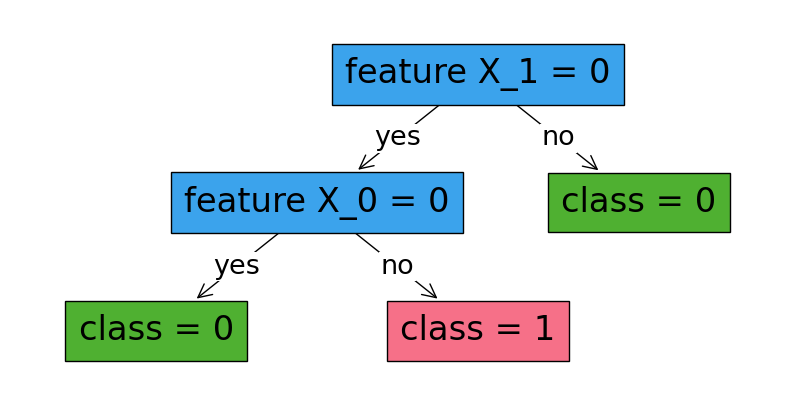

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
fcl_wo_SP.plot_tree()
plt.show()

## Evaluating Statistical Parity with Fairbound=0.1

In [7]:
fcl_w_SP = test_FairTree_metrics(X, y, P, l, "SP", 0.1)
fcl_w_SP.fairness_metric_summary("SP")
print(
    "The in-sample accuracy is {}".format(np.sum(fcl_w_SP.predict(X) == y) / y.shape[0])
)

    (p,y)  P(Y=y|P=p)
0  (0, 1)         0.5
1  (1, 1)         0.5
2  (0, 0)         0.5
3  (1, 0)         0.5
The in-sample accuracy is 0.6785714285714286


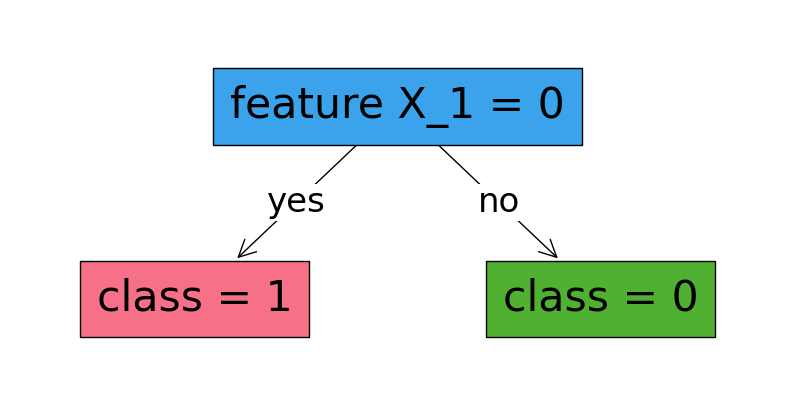

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
fcl_w_SP.plot_tree()
plt.show()

## Evaluating PE Without Fairness Constraint

In [9]:
fcl_wo_PE = test_FairTree_metrics(X, y, P, l, "PE", 1)
fcl_wo_PE.fairness_metric_summary("PE")
print(
    "The in-sample accuracy is {}".format(
        np.sum(fcl_wo_PE.predict(X) == y) / y.shape[0]
    )
)

  (p, y, y_pred)  P(Y_pred=y_pred|P=p, Y=y)
0      (0, 0, 0)                   0.888889
1      (1, 0, 0)                   0.833333
2      (0, 0, 1)                   0.111111
3      (1, 0, 1)                   0.166667
4      (0, 1, 0)                   0.600000
5      (1, 1, 0)                   0.375000
6      (0, 1, 1)                   0.400000
7      (1, 1, 1)                   0.625000
The in-sample accuracy is 0.7142857142857143


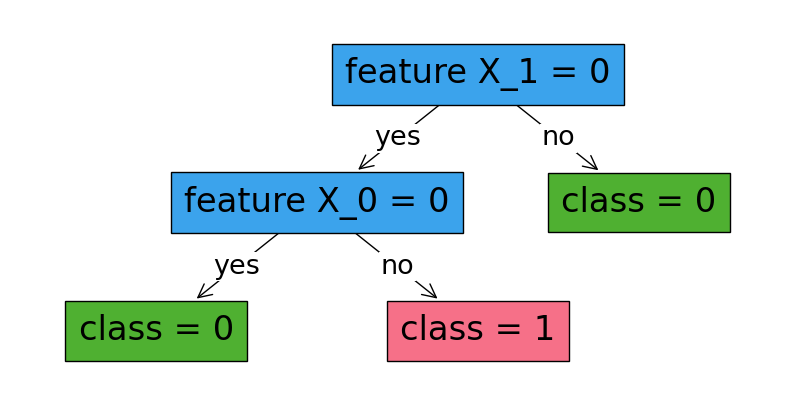

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
fcl_wo_PE.plot_tree()
plt.show()

## Evaluating PE with Fairbound=0.04

In [11]:
fcl_w_PE = test_FairTree_metrics(X, y, P, l, "PE", 0.04)
fcl_w_PE.fairness_metric_summary("PE")
print(
    "The in-sample accuracy is {}".format(np.sum(fcl_w_PE.predict(X) == y) / y.shape[0])
)

  (p, y, y_pred)  P(Y_pred=y_pred|P=p, Y=y)
0      (0, 0, 0)                        1.0
1      (1, 0, 0)                        1.0
2      (0, 0, 1)                        0.0
3      (1, 0, 1)                        0.0
4      (0, 1, 0)                        1.0
5      (1, 1, 0)                        1.0
6      (0, 1, 1)                        0.0
7      (1, 1, 1)                        0.0
The in-sample accuracy is 0.5357142857142857


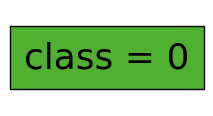

In [12]:
fig, ax = plt.subplots(figsize=(2.5, 1.25))
fcl_w_PE.plot_tree()
plt.show()